# Mochamad Khaairi (2106416)

C2 2021

Selasa, 03-01-2023

Deskripsi Soal
IPM (Indeks Pembangunan Manusia) adalah ukuran kualitas sumber daya manusia. PMI memiliki tiga dimensi: (1) umur panjang dan hidup sehat (a long and healthy life), (2) pengetahuan (knowledge), dan (3) standar hidup layak (decent standard of living).  PMI dihitung menggunakan data harapan hidup, rata-rata lama sekolah, pengeluaran per kapita.

Asumsikan kategorisasi PMI adalah sebagai berikut:  <60: sangat rendah; 60 < pmi < 70: sedang; 70 < pmi < 80: rendah; >80 sangat tinggi.

Anda diminta memprediksi tingkat PMI per provinsi tanpa menggunakan data yang dapat digunakan untuk menghitung langsung (data proksi). Model ini bermanfaat untuk pengecekan silang dan dapat digunakan jika data yang diperlukan tidak tersedia.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### EDA (Exploratory Data Analysis) dan Prarposes

#### Data pangan

digunakan data ketidak cukupan pangan untuk mengukur angka harapan hidup

In [2]:
df_pangan = pd.read_csv("D:/Kuliah/UPI/SEMESTER 3/Data Mining dan Warehouse/UAS/ketidak_cukupan_pangan_prov.csv")

In [3]:
df_pangan.describe(include=('object'))

,prov
count,175
unique,35
top,ACEH
freq,5


In [4]:
df_pangan.loc[df_pangan['prov'] =='ACEH']

,tahun,pct_tdk_cukup_pangan,prov
0,2021,6.90,ACEH
35,2020,8.58,ACEH
70,2019,9.41,ACEH
105,2018,8.68,ACEH
140,2017,8.40,ACEH


drop atribut tahun untuk keperluan merge

In [5]:
df_pangan = df_pangan.drop(["tahun"], axis=1)

Ubah persentase tidak cukup pangan menjadi mean untuk tiap tahunnya

In [6]:
df_pangan["pct_tdk_cukup_pangan"] = df_pangan.groupby(['prov'])['pct_tdk_cukup_pangan'].transform("mean")

In [7]:
df_pangan.loc[df_pangan['prov'] =='ACEH']

,pct_tdk_cukup_pangan,prov
0,8.394,ACEH
35,8.394,ACEH
70,8.394,ACEH
105,8.394,ACEH
140,8.394,ACEH


drop duplikat

In [8]:
df_pangan = df_pangan.drop_duplicates()

#### Data Persentase Perempuan yang Sudah Menikah Sebelum 18 Tahun

digunakan data persentase perempuan yang sudah menikah sebelum 18 tahun sebagai gambaran angka harapan lama sekolah dengan asumsi ketika perempuan sudah menikah sebelum usia 18 tahun sama dengan putus sekolah

In [9]:
df_sekolah = pd.read_csv("D:/Kuliah/UPI/SEMESTER 3/Data Mining dan Warehouse/UAS/proporsi_perempuan_18_24_nikah_prov.csv")

cek data, ternyata untuk provinsi tidak hanya memiliki satu data, seperti yang terlihat pada table di bawah bahwa prov aceh memiliki 7 record data

In [10]:
df_sekolah.describe(include=('object'))

,prov
count,245
unique,35
top,ACEH
freq,7


cek data dengan prov yang sama, ternyata didapatkan bahwa terdapat lebih dari satu record untuk provinsi karena perbedaan tahun dari data pct_perempuan_nikahnya, maka lakukan praproses dengan mencari rata-rata persen_anak_dengan_akte_lahir untuk tiap provinsi di semua tahunnya

In [11]:
df_sekolah.loc[df_sekolah['prov'] =='ACEH']

,tahun,pct_perempuan_nikah,prov
0,2021,30.60,ACEH
35,2020,32.61,ACEH
70,2019,26.13,ACEH
105,2018,20.56,ACEH
140,2017,20.80,ACEH
175,2016,18.18,ACEH
210,2015,15.47,ACEH


drop atribut tahun untuk keperluan merge

In [12]:
df_sekolah = df_sekolah.drop(["tahun"], axis=1)

mengubah pct_perempuan_nikah untuk tiap provinsi menjadi rata-rata semua tahunnya

In [13]:
df_sekolah["pct_perempuan_nikah"] = df_sekolah.groupby(['prov'])['pct_perempuan_nikah'].transform("mean")

cek data, ternyata untuk pct_perempuan_nikah sudah menjadi rata-rata tetapi masih terdapat duplikasi sehingga perlu dihapus duplikasinya

In [14]:
df_sekolah.loc[df_sekolah['prov'] =='ACEH']

,pct_perempuan_nikah,prov
0,23.478571,ACEH
35,23.478571,ACEH
70,23.478571,ACEH
105,23.478571,ACEH
140,23.478571,ACEH
175,23.478571,ACEH
210,23.478571,ACEH


hapus duplikasi

In [15]:
df_sekolah = df_sekolah.drop_duplicates()

cek untuk satu provinsi sekarang hanya terdapat satu record data

In [16]:
df_sekolah.loc[df_sekolah['prov'] =='ACEH']

,pct_perempuan_nikah,prov
0,23.478571,ACEH


#### Data persen anak dengan akte lahir

digunakan data persen anak dengan akte lahir sebagai indikator perhitungan angka harapan hidup yaitu banyaknya penduduk yang mampu melewati umur tertentu, dan banyaknya penduduk yang dilahirkan hidup dari suatu generasi sampai mencapai umur tertentu.

In [17]:
df_anak = pd.read_csv("D:/Kuliah/UPI/SEMESTER 3/Data Mining dan Warehouse/UAS/persen_anak_dengan_akte_lahir.csv")

In [18]:
df_anak.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tahun                          245 non-null    int64  
 1   persen_anak_dengan_akte_lahir  245 non-null    float64
 2   prov                           245 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


cek data dengan prov yang sama, ternyata didapatkan bahwa terdapat prov yang sama hanya berbeda tahunnya saja, maka lakukan praproses dengan mencari rata-rata persen_anak_dengan_akte_lahir untuk tiap provinsi di semua tahunnya

In [19]:
df_anak.loc[df_anak['prov'] =='ACEH']

,tahun,persen_anak_dengan_akte_lahir,prov
0,2021,94.52,ACEH
35,2020,93.84,ACEH
70,2019,91.22,ACEH
105,2018,87.85,ACEH
140,2017,87.83,ACEH
175,2016,82.18,ACEH
210,2015,80.89,ACEH


drop atribut tahun untuk keperluan merge

In [20]:
df_anak = df_anak.drop(["tahun"], axis=1)

mengubah persen_anak_dengan_akte_lahir untuk tiap provinsi menjadi rata-rata semua tahunnya

In [21]:
df_anak["persen_anak_dengan_akte_lahir"] = df_anak.groupby(['prov'])['persen_anak_dengan_akte_lahir'].transform("mean")

drop duplikasi

In [22]:
df_anak = df_anak.drop_duplicates()

cek untuk satu provinsi sekarang hanya terdapat satu data persen_anak_dengan_akte_lahir

In [23]:
df_anak.loc[df_anak['prov'] =='ACEH']

,persen_anak_dengan_akte_lahir,prov
0,88.332857,ACEH


menggunakan data PMI sebagai data yang nanti akan diprediksi

In [24]:
df_pmi = pd.read_csv("D:/Kuliah/UPI/SEMESTER 3/Data Mining dan Warehouse/UAS/pmi.csv")

In [25]:
df_pmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prov          442 non-null    object
 1   tahun         442 non-null    int64 
 2   kategori_pmi  442 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.5+ KB


cek ada kategori apa saja pada atribut kategori_pmi

In [26]:
df_pmi['kategori_pmi'].unique()

array(['TINGGI', 'SANGAT TINGGI', 'SEDANG', 'SANGAT RENDAH'], dtype=object)

ubah atribut kategori_pmi menjadi integer untuk kerpeluan melihat korelasi

In [27]:
df_pmi['kategori_pmi'].replace({'SANGAT RENDAH':0,'SEDANG':1,'TINGGI':2,'SANGAT TINGGI':3}, inplace=True)

In [28]:
df_pmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prov          442 non-null    object
 1   tahun         442 non-null    int64 
 2   kategori_pmi  442 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.5+ KB


#### Data rumah menyewa

Data persen rumah menyewa sebagai acuan standar hidup layak

In [29]:
df_rumah = pd.read_csv("D:/Kuliah/UPI/SEMESTER 3/Data Mining dan Warehouse/UAS/persen_rumah_menyewa.csv")

In [30]:
df_rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tahun                 245 non-null    int64  
 1   persen_rumah_menyewa  245 non-null    float64
 2   prov                  245 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


In [31]:
df_rumah.describe(include=('object'))

,prov
count,245
unique,35
top,ACEH
freq,7


In [32]:
df_rumah = df_rumah.drop(["tahun"], axis=1)

In [33]:
df_rumah["persen_rumah_menyewa"] = df_rumah.groupby(['prov'])['persen_rumah_menyewa'].transform("mean")

In [34]:
df_rumah = df_rumah.drop_duplicates()

In [35]:
df_rumah.describe(include=('object'))

,prov
count,35
unique,35
top,ACEH
freq,1


#### Proses Merge

merge PMI dengan data akte anak

In [36]:
df_temp = pd.merge(df_pmi, df_anak, on = 'prov', how = 'left')

In [37]:
df_temp.head()

,prov,tahun,kategori_pmi,persen_anak_dengan_akte_lahir
0,ACEH,2022,2,88.332857
1,SUMATERA UTARA,2022,2,74.298571
2,SUMATERA BARAT,2022,2,83.928571
3,RIAU,2022,2,78.497143
4,JAMBI,2022,2,91.507143


In [38]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   prov                           442 non-null    object 
 1   tahun                          442 non-null    int64  
 2   kategori_pmi                   442 non-null    int64  
 3   persen_anak_dengan_akte_lahir  442 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 17.3+ KB


Merge lagi dengan data perempuan sudah menikah

In [39]:
df_temp2 = pd.merge(df_temp, df_sekolah, on = 'prov', how = 'left')

In [40]:
df_temp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   prov                           442 non-null    object 
 1   tahun                          442 non-null    int64  
 2   kategori_pmi                   442 non-null    int64  
 3   persen_anak_dengan_akte_lahir  442 non-null    float64
 4   pct_perempuan_nikah            442 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 20.7+ KB


Merge lagi dengan data pangan

In [41]:
df_temp3 = pd.merge(df_temp2, df_pangan, on = 'prov', how = 'left')

In [42]:
df_temp3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   prov                           442 non-null    object 
 1   tahun                          442 non-null    int64  
 2   kategori_pmi                   442 non-null    int64  
 3   persen_anak_dengan_akte_lahir  442 non-null    float64
 4   pct_perempuan_nikah            442 non-null    float64
 5   pct_tdk_cukup_pangan           442 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 24.2+ KB


Merge lagi dengan data rumah menyewa

In [43]:
df_final = pd.merge(df_temp3, df_rumah, on = 'prov', how = 'left')

In [44]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   prov                           442 non-null    object 
 1   tahun                          442 non-null    int64  
 2   kategori_pmi                   442 non-null    int64  
 3   persen_anak_dengan_akte_lahir  442 non-null    float64
 4   pct_perempuan_nikah            442 non-null    float64
 5   pct_tdk_cukup_pangan           442 non-null    float64
 6   persen_rumah_menyewa           442 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 27.6+ KB


cek korelasi antar data terutama terhadap atribut kategori_pmi, dapat dilihat bahwa persen rumah menyewa memiliki koralesi positif terbesar terhadap kategori pmi berbanding terbalik dengan persentase tidak cukup pangan yang berkorelasi negatif

<AxesSubplot:>

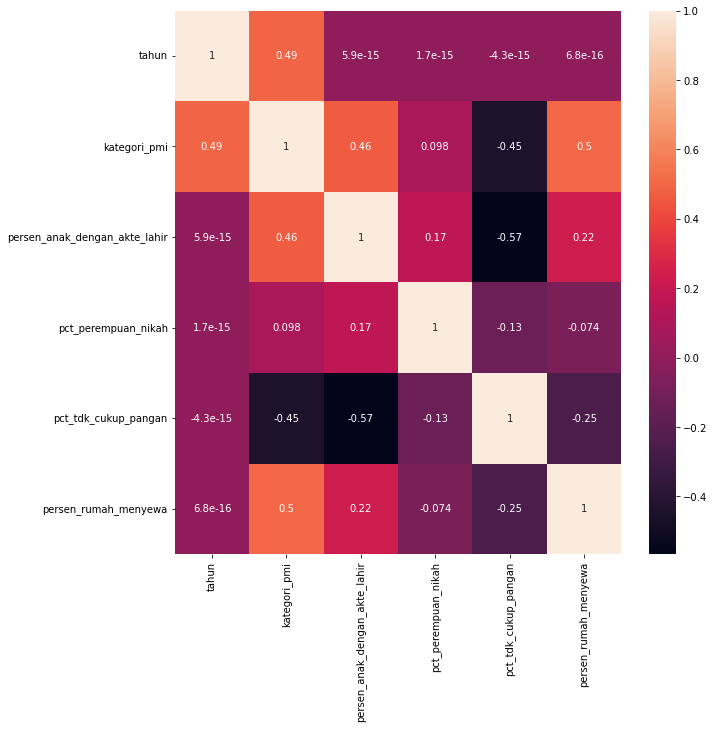

In [45]:
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df_final.corr(), annot = True, ax=ax)

### Pembuatan Model

In [46]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   prov                           442 non-null    object 
 1   tahun                          442 non-null    int64  
 2   kategori_pmi                   442 non-null    int64  
 3   persen_anak_dengan_akte_lahir  442 non-null    float64
 4   pct_perempuan_nikah            442 non-null    float64
 5   pct_tdk_cukup_pangan           442 non-null    float64
 6   persen_rumah_menyewa           442 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 27.6+ KB


drop atribut prov dan tahun 

In [47]:
df_final = df_final.drop(["prov", "tahun"], axis = 1)

In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   kategori_pmi                   442 non-null    int64  
 1   persen_anak_dengan_akte_lahir  442 non-null    float64
 2   pct_perempuan_nikah            442 non-null    float64
 3   pct_tdk_cukup_pangan           442 non-null    float64
 4   persen_rumah_menyewa           442 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 20.7 KB


membuat label untuk data target

In [49]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_final["kategori_pmi"])
Y = le.transform(df_final["kategori_pmi"]) 

hapus data target pada dataset

In [50]:
X = df_final.drop("kategori_pmi",axis=1)

split data antara data train dan data test (80% data train, 20% data test)

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

Dilakukan pembuatan model dengan menggunakan random forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=100, random_state=123, max_depth=10)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.651685393258427
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.73      0.76      0.75        54
           2       0.57      0.50      0.53        32
           3       0.00      0.00      0.00         1

    accuracy                           0.65        89
   macro avg       0.41      0.44      0.42        89
weighted avg       0.66      0.65      0.65        89



Seperti yang terlihat pada hasil pembuatan model di atas didapatkan f1-score untuk PMI pada kelas Sangat Rendah (0) adalah sebesar 0.40 dan pada kelas Rendah (1) sebesar 0.75

Selanjutnya mencoba membuat model menggunakan XgBoost

In [56]:
import xgboost as xgb
#clf4 = xgb.XGBClassifier(objective = "binary:logistic", eval_metric = "mlogloss", max_depth = 24, gamma=0.1, subsample = 0.90,learning_rate=0.01, n_estimators = 10, nthread=-1)
clf2=xgb.XGBClassifier(max_depth=10, learning_rate=0.1, gamma=0.1, n_estimators=100, objective='binary:logistic', booster='dart', colsample_bytree=0.7, colsample_bylevel=0.8, colsample_bynode=0.8, normalize_type='forest', sample_type='weighted', tree_method='gpu_hist', sampling_method='gradient_based')
# num_class adalah jumlah kelas
clf2.fit(X_train, Y_train)
Y_pred = clf2.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.6629213483146067
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.72      0.81      0.77        54
           2       0.61      0.44      0.51        32
           3       0.00      0.00      0.00         1

    accuracy                           0.66        89
   macro avg       0.42      0.44      0.42        89
weighted avg       0.66      0.66      0.66        89



Didapatkan hasil yang lebih baik daripada menggunakan random forest dengan score acuraccy keseluruhan 0.66, terlihat peningkatan pada f1-score untuk PMI pada kelas Rendah (1) menjadi 0.77 yang sebelumnya 0.75

In [57]:
feature_importances = pd.DataFrame(clf2.feature_importances_,index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
persen_anak_dengan_akte_lahir,0.293500
pct_tdk_cukup_pangan,0.290854
persen_rumah_menyewa,0.265881
pct_perempuan_nikah,0.149766


Setelah dilihat fiture importance nya didapatkan bahwa atribut persen anak dengan akte lahir yang paling berpengaruh, tidak sejalan dengan korelasi pada heatmap di atas bahwa persen rumah sewa lah yang paling berkorelasi